In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white

#Pandas settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_theme(style="whitegrid")

In [2]:
#change directory for your path
os.chdir('E:\\OneDrive\\Documents\\GitHub\\eHealthEquity\\Research\\Data Source')

In [3]:
df = pd.read_csv('acs5y_2021_brfss_2021_merged.csv')

index_list = [
    'state','county'
]
brfss_list = [
    col for col in df.columns if col.startswith('brfss_') 
    and not col.endswith('crdprv') 
    and not col.endswith('upper') 
    and not col.endswith('lower')
]
acs_list = [
    col for col in df.columns if col.startswith('pct_')
]

all_columns = index_list + brfss_list + acs_list

df = df[all_columns]

In [4]:
df.head(5)

,state,county,brfss_access2_ageadjprv,brfss_checkup_ageadjprv,brfss_csmoking_ageadjprv,brfss_depression_ageadjprv,brfss_diabetes_ageadjprv,brfss_ghlth_ageadjprv,brfss_mhlth_ageadjprv,brfss_obesity_ageadjprv,pct_ed_lt9,pct_ed_9_12,pct_ed_hs,pct_ed_sc,pct_ed_asc,pct_ed_b,pct_ed_gr,pct_age_gte65,pct_race_white,pct_race_black,pct_race_aian,pct_race_asian,pct_race_nhopi,pct_race_other,pct_eth_hisp,pct_sex_male,pct_sex_female,pct_occ_unemp,pct_occ_mgt,pct_occ_svc,pct_occ_sales,pct_occ_nat_res,pct_occ_prod,pct_hlth_unins,pct_ses_pov,pct_tp_veh_0,pct_tp_veh_1,pct_tp_veh_2,pct_tp_veh_3,pct_dg_bb_int
0,Alaska,Aleutians East,16.9,60.7,18.6,13.1,12.6,19.1,12.9,31.3,6.1,9.2,41.6,21.9,5.4,10.6,5.4,11.7,14.6,2.1,44.1,20.9,0.3,6.5,10.5,59.1,40.9,3.5,23.9,13.2,11.7,12.7,38.6,40.0,13.4,24.0,37.2,28.0,10.8,57.5
1,Alaska,Aleutians West,13.7,61.6,15.5,13.4,10.9,15.3,12.2,30.3,4.8,4.1,43.4,25.1,5.8,14.4,2.4,7.0,24.5,3.5,10.5,45.8,1.7,5.5,9.7,57.0,43.0,3.1,16.1,15.5,23.3,10.9,34.1,19.6,8.3,14.2,39.8,35.5,10.5,77.0
2,Alaska,Anchorage,10.4,62.9,14.9,19.5,7.8,13.5,14.5,32.9,2.2,3.7,23.7,25.0,8.6,22.8,14.0,11.5,60.3,5.4,7.2,9.7,2.9,2.7,9.5,51.2,48.8,3.6,41.6,18.0,21.0,8.3,11.1,10.5,9.1,5.5,32.9,39.8,21.8,92.7
3,Alaska,Bethel,19.2,62.6,35.4,21.2,15.9,30.0,21.4,43.1,6.9,11.2,46.6,18.1,4.5,7.3,5.5,7.5,9.6,0.9,84.5,1.4,0.2,0.2,2.1,52.5,47.5,11.3,34.4,20.5,24.4,7.4,13.3,15.1,28.5,60.1,23.9,11.6,4.4,74.8
4,Alaska,Bristol Bay,10.3,61.4,18.7,18.8,8.6,14.4,15.4,35.6,3.0,2.3,30.2,33.7,8.7,16.8,5.3,13.1,44.8,0.6,33.2,4.1,1.5,2.9,12.8,56.5,43.5,1.6,37.2,11.5,17.8,17.6,15.8,17.0,3.5,9.8,39.4,24.8,26.0,76.5


# Linear Regression Assumptions Check
1. Linearity between the dependent variable and the independent variables **PASS**
    * The relationship between the dependent variable and the independent variables is linear. 
2. No or little multicollinearity between the independent variables **FAIL** but mitigated. 
    * There are multiple examples of high multicollinearity in the data via the correlation matrix and VIF scores.
3. No auto-correlation in the data (i.e. the data is not time-series data) **PASS** 
4. Homoscedasticity (i.e. the variance of the error terms is similar across all the independent variables) **FAIL** 

In [37]:
dv = [
    'brfss_diabetes_ageadjprv'
]
iv = [
    'pct_dg_bb_int'
]
covariates = [
    "brfss_access2_ageadjprv",
    "brfss_checkup_ageadjprv",
    "brfss_csmoking_ageadjprv",
    "brfss_mhlth_ageadjprv",
    "brfss_obesity_ageadjprv",
    "pct_ed_lt9",
    "pct_ed_9_12",
    "pct_ed_hs",
    "pct_ed_sc",
    "pct_ed_asc",
    "pct_ed_b",
    "pct_ed_gr",
    "pct_age_gte65",
    "pct_occ_unemp",
    "pct_occ_mgt",
    "pct_occ_svc",
    "pct_occ_sales",
    "pct_occ_nat_res",
    "pct_occ_prod",
    "pct_ses_pov",
    "pct_tp_veh_0",
    "pct_tp_veh_1",
    "pct_tp_veh_2",
    "pct_tp_veh_3"
]

X = df[iv + covariates]
y = df[dv]

### VIF Scores - Multicollinearity **FAIL**

In [6]:
#Multicollinearity Check
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.round(1)
vif[vif['VIF'] > 5]

,variables,VIF
0,pct_dg_bb_int,287.8
1,brfss_access2_ageadjprv,16.6
2,brfss_checkup_ageadjprv,494.5
3,brfss_csmoking_ageadjprv,177.8
4,brfss_mhlth_ageadjprv,297.5
5,brfss_obesity_ageadjprv,203.4
6,pct_ed_lt9,4117.7
7,pct_ed_9_12,9093.1
8,pct_ed_hs,157813.2
9,pct_ed_sc,62318.9


### Assumtion Failed: Multicollinearity 
- will need to consider alternative methods to deal with multicollinear variables such as ridge/lasso regression, or partial least squares regression
- continue with vars that have VIF less than 10 (trial and error)

In [129]:
dv = [
    'brfss_diabetes_ageadjprv'
]
iv = [
    'pct_dg_bb_int'
]
covariates = [
    "pct_occ_unemp",
    "pct_ses_pov",
    "pct_tp_veh_0",
    "pct_hlth_unins",
    "pct_eth_hisp",
    "pct_race_black",
    "pct_race_aian",
    "pct_race_nhopi",
    "pct_race_other"
]
_X = df[iv + covariates]
_y = df[dv]

vif = pd.DataFrame()
vif["variables"] = _X.columns
vif["VIF"] = [variance_inflation_factor(_X.values, i) for i in range(_X.shape[1])]
vif = vif.round(1)
vif[vif['VIF'] > 10]

,variables,VIF


# Feature Selection (VIF less than 10 variables)

                    Results: Ordinary least squares
Model:              OLS                   Adj. R-squared:     0.787     
Dependent Variable: brfss_ghlth_ageadjprv AIC:                13323.8695
Date:               2023-09-22 16:22      BIC:                13378.1520
No. Observations:   3076                  Log-Likelihood:     -6652.9   
Df Model:           8                     F-statistic:        1420.     
Df Residuals:       3067                  Prob (F-statistic): 0.00      
R-squared:          0.787                 Scale:              4.4405    
-------------------------------------------------------------------------
                     Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------------
Intercept           20.0387    0.5971   33.5579  0.0000  18.8679  21.2096
pct_dg_bb_int       -0.1328    0.0063  -21.1016  0.0000  -0.1451  -0.1204
pct_ses_pov          0.4377    0.0088   49.4843  0.0000   0.4204   

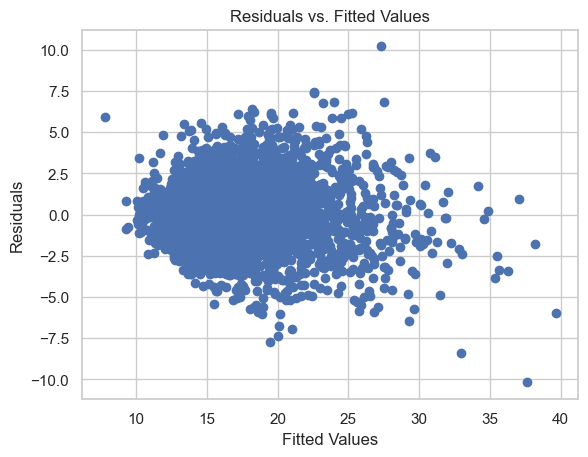

In [137]:
model = smf.ols(formula=
                'brfss_ghlth_ageadjprv ~ pct_dg_bb_int + pct_ses_pov + pct_hlth_unins + pct_tp_veh_0 + pct_race_black + pct_race_aian + pct_race_nhopi + pct_eth_hisp',
                 data=df)
results = model.fit()

mae = np.mean(np.abs(results.resid))
white_test = het_white(results.resid, results.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

print(results.summary2())
print("MAE: ", mae)
print(dict(zip(labels, white_test)))

#plot residuals
residuals = results.resid
plt.scatter(results.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


In [39]:
# Feature Selection using Recursive Feature Elimination and SVR 
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

model = SVR(kernel="linear")
rfecv = RFECV(estimator=model, step=1, cv=5, n_jobs=-1)
rfecv.fit(X, y)
print("Number of features in original dataset: %d" % X.shape[1])
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))


Number of features in original dataset: 25
Optimal number of features: 25
Selected features: ['pct_dg_bb_int', 'brfss_access2_ageadjprv', 'brfss_checkup_ageadjprv', 'brfss_csmoking_ageadjprv', 'brfss_mhlth_ageadjprv', 'brfss_obesity_ageadjprv', 'pct_ed_lt9', 'pct_ed_9_12', 'pct_ed_hs', 'pct_ed_sc', 'pct_ed_asc', 'pct_ed_b', 'pct_ed_gr', 'pct_age_gte65', 'pct_occ_unemp', 'pct_occ_mgt', 'pct_occ_svc', 'pct_occ_sales', 'pct_occ_nat_res', 'pct_occ_prod', 'pct_ses_pov', 'pct_tp_veh_0', 'pct_tp_veh_1', 'pct_tp_veh_2', 'pct_tp_veh_3']


In [131]:
# sklearn linear regression
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)


model = linear_model.LinearRegression()
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
print("Cross-validated score:", scores)
y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',  metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))
#adjusted R2
n = X_test.shape[0]
p = X_test.shape[1]
r2 = metrics.r2_score(y_test, y_pred)
adj_r2 = 1 - ((1-r2)*(n-1)/(n-p-1))
print('Adjusted R2:', adj_r2)

#print coef and intercept with column names
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Features:", X.columns)



Cross-validated score: [-0.57097993 -0.52809526 -0.51272909 -0.5061508  -0.59663035 -0.52692569
 -0.49442037 -0.50242678 -0.52409031 -0.55201437]
Mean Absolute Error: 0.5211600206495274
Mean Squared Error: 0.44302420398979775
Root Mean Squared Error: 0.6656006340064572
R2: 0.9101028330620821
Adjusted R2: 0.9070780293293123
Intercept: 18.507493699572503
Coefficients: [-0.02639395  0.11111618  0.06386048 -0.02979621  0.08862475  0.11919399
  0.00106277  0.05121237 -0.04653603 -0.02180185 -0.04624403 -0.04854846
 -0.01845903 -0.03832202  0.1265268  -0.18313392 -0.17690914 -0.18949665
 -0.20721127 -0.19287418  0.1092355   0.05253206  0.04266718  0.01702011
  0.04094786]
Features: Index(['pct_dg_bb_int', 'brfss_access2_ageadjprv', 'brfss_checkup_ageadjprv',
       'brfss_csmoking_ageadjprv', 'brfss_mhlth_ageadjprv',
       'brfss_obesity_ageadjprv', 'pct_ed_lt9', 'pct_ed_9_12', 'pct_ed_hs',
       'pct_ed_sc', 'pct_ed_asc', 'pct_ed_b', 'pct_ed_gr', 'pct_age_gte65',
       'pct_occ_unemp', '

In [87]:
model = linear_model.ElasticNet()
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
print("Cross-validated score:", scores)
y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',  metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))
#print coef and intercept with column names
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Features:", X.columns)

Cross-validated score: [-0.64691426 -0.59451774 -0.53916317 -0.57412309 -0.66833758 -0.61081627
 -0.56433026 -0.55641764 -0.60904702 -0.57204397]
Mean Absolute Error: 0.5840925183111846
Mean Squared Error: 0.5580980524077457
Root Mean Squared Error: 0.7470596043206631
R2: 0.8867523865892858
Intercept: 2.277021102524655
Coefficients: [-0.01904452  0.11366483  0.04377679  0.          0.          0.09000867
  0.00126701  0.0637498  -0.         -0.         -0.         -0.
  0.         -0.02858608  0.         -0.          0.          0.
 -0.          0.          0.14973431  0.010857    0.00388271 -0.00525547
 -0.00695892]
Features: Index(['pct_dg_bb_int', 'brfss_access2_ageadjprv', 'brfss_checkup_ageadjprv',
       'brfss_csmoking_ageadjprv', 'brfss_mhlth_ageadjprv',
       'brfss_obesity_ageadjprv', 'pct_ed_lt9', 'pct_ed_9_12', 'pct_ed_hs',
       'pct_ed_sc', 'pct_ed_asc', 'pct_ed_b', 'pct_ed_gr', 'pct_age_gte65',
       'pct_occ_unemp', 'pct_occ_mgt', 'pct_occ_svc', 'pct_occ_sales',
    

In [135]:
model = linear_model.Ridge(alpha=10)
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
print("Cross-validated score:", scores)
y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',  metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))
#print coef and intercept with column names
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Features:", X.columns)

Cross-validated score: [-0.57100244 -0.5265206  -0.51208264 -0.50622992 -0.5972081  -0.52592985
 -0.49386501 -0.50137373 -0.52438749 -0.55126054]
Mean Absolute Error: 0.5210675159643583
Mean Squared Error: 0.4428605924921639
Root Mean Squared Error: 0.6654777175023698
R2: 0.910136032625409
Intercept: 4.270456440192298
Coefficients: [-0.02642793  0.11100525  0.06379348 -0.02952199  0.08847043  0.11916048
  0.01617888  0.06648406 -0.03150575 -0.0066576  -0.03118675 -0.0334137
 -0.00343877 -0.03834419  0.12612609 -0.02383749 -0.01757186 -0.0301748
 -0.04791191 -0.0336479   0.10908776  0.02067961  0.01077998 -0.01485127
  0.00895595]
Features: Index(['pct_dg_bb_int', 'brfss_access2_ageadjprv', 'brfss_checkup_ageadjprv',
       'brfss_csmoking_ageadjprv', 'brfss_mhlth_ageadjprv',
       'brfss_obesity_ageadjprv', 'pct_ed_lt9', 'pct_ed_9_12', 'pct_ed_hs',
       'pct_ed_sc', 'pct_ed_asc', 'pct_ed_b', 'pct_ed_gr', 'pct_age_gte65',
       'pct_occ_unemp', 'pct_occ_mgt', 'pct_occ_svc', 'pct_occ

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.